# Лекция 5
# Введение в задачу классификации.<br>Постановка задачи и подготовка данных.

* [Теоретическая часть](#theory)
    * [Задача классификации](#classification)
    * [Метрики качества](#metrics)
* [Практическая часть](#practice)
    * [Постановка задачи](#task)
    * [Загрузка данных](#load_data)
    * [Приведение типов](#cast)
    * [Обзор данных](#review)    
    * [Обработка пропусков](#gaps)
    * [Обработка выбросов](#outliers)
    * [Построение новых признаков](#new_features)
    * [Сохранение обучающего датасета](#saving)
    * [Обучение модели](#training)
    * [Подсчет метрик](#count_metrics)


## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

### Задача классификации<a class="anchor" id="classification"></a>

Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Для некоторых объектов из этого множества известна их классовая принадлежность - это подмножество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

*Классифицировать объект* — значит, указать номер (или наименование класса), к которому относится данный объект.

*Классификация объекта* — номер или наименование класса, выдаваемый алгоритмом классификации в результате его применения к данному конкретному объекту.


**Бинарная классификация**

Данные разделены на два класса, необходимо обучить модель определять принадлежность произвольного объекта (из рассматриваемого множества) к одному из них. На выходе алгоритм должен выдавать либо метку одного из двух классов, либо вероятности принадлежности рассматриваемого объекта к каждому из них.

*Пример решения задачи бинарной классификации с помощью линейной модели*

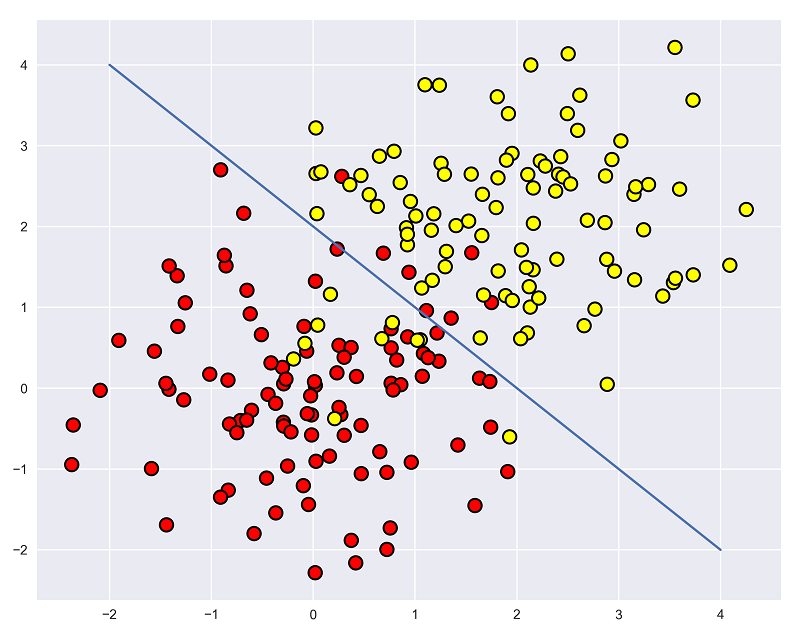

*Пример решения задачи бинарной классификации с помощью деревьев решений*

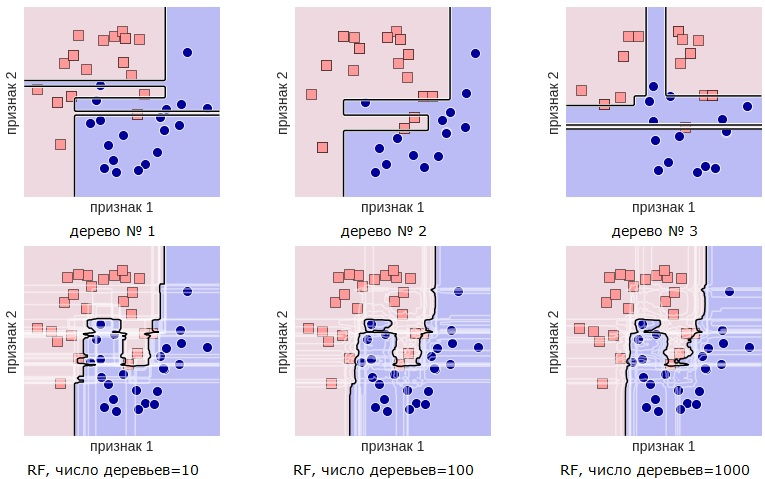

**Многоклассовая классификация**

Постановка задачи аналогична задаче бинарной классификации, при условии, что количество классов больше двух.
Решается задача, как правило, с помощью всё тех же бинарных классификаторов, но используются различные подходы при их обучении и агрегации прогнозов.

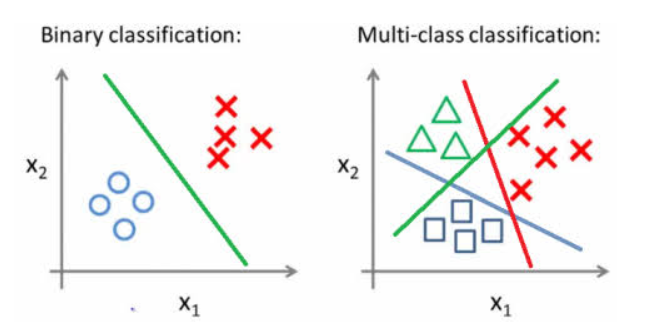

*Подход One-vs-All*

Обучается N бинарных классификаторов, где N - количестве классов и N > 2, таким образом, что каждый из них учится определять только один вид класса от всех остальных. После чего входной объект оценивается каждым из классификаторов и принимается решение об отнесении объекта к одному из N классов, исходя из того, какой классификатор показал большую степень уверенности в том, что объект относится именно к его классу.


Classifier 1: Green vs. [Blue, Red]<br>
Classifier 2: Red vs. [Blue, Green]<br>
Classifier 3: Blue vs. [Red, Green]

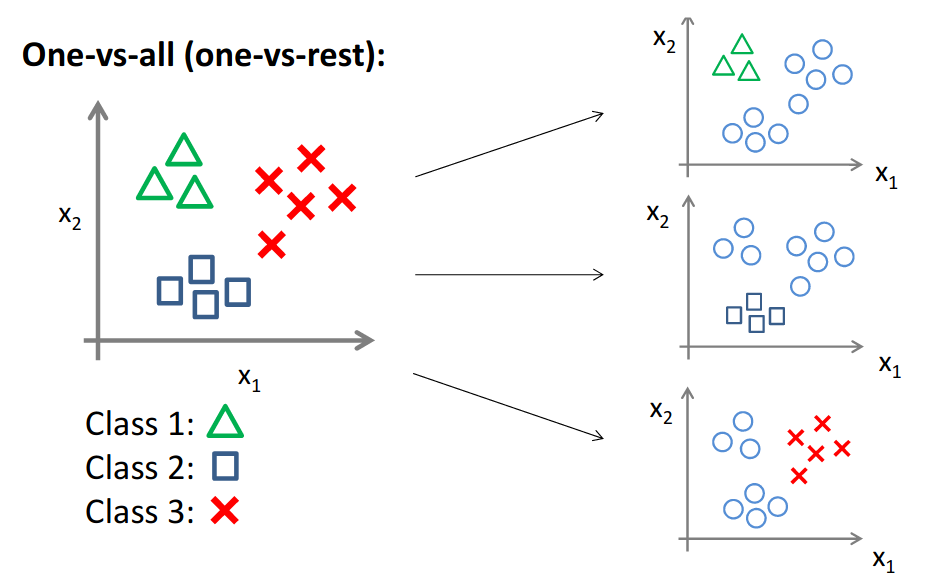

*Подход One-vs-One*

Обучается N*(N-1)/2 бинарных классификаторов, где N - количестве классов и N > 2, таким образом, что каждый из них учится определять один вид класса от другого класса. Каждый классификатор предсказывает один класс. Входной объект оценивается каждым из классификаторов и выдается в ответ тот класс, которого оказалось больше.


Classifier 1: Black vs. Blue<br>
Classifier 2: Black vs. Red<br>
Classifier 3: Blue vs. Red

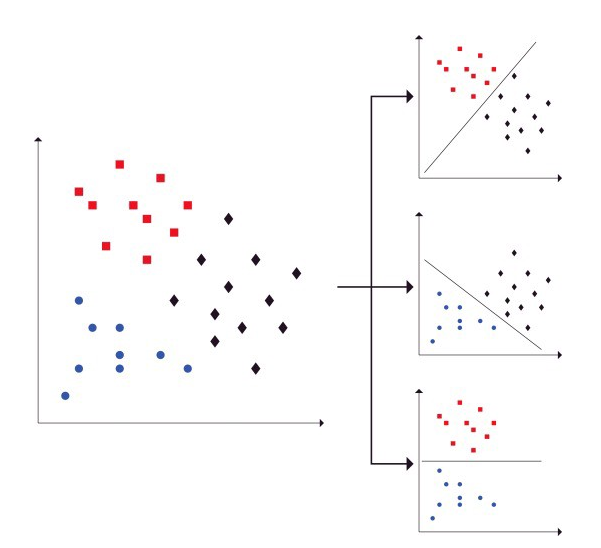

### <center><i>Разница подходов</i></center>
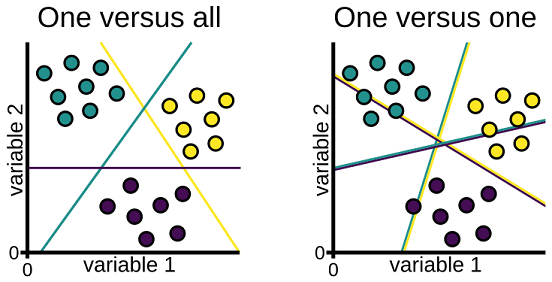

### Метрики качества<a class="anchor" id="metrics"></a>

*Пример*

Есть выборка из 13 животных, из которых 8 - кошки и 5 - другие животные.

**Accuracy (доля правильных ответов)**

*Accuracy* - доля правильных ответов отражает процент объектов, для которых классы были определены верно, среди всего множества объектов.

<center>$\large accuracy = \LARGE \frac{T}{N} = \frac{TP \: + \: TN}{TP \: + \: TN \: + \: FP \: + \: FN}$<center>

$T$ - количество объектов, для которых классы были определены верно<br>
$N$ - общее количество объектов

**Проблемы accuracy:**
    
1. Дисбаланс классов
2. Разная цена ошибки

**Confusion matrix (матрица ошибок)**

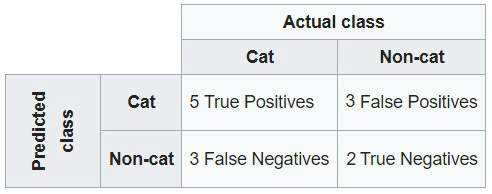

Positive - алгоритм предсказал, что объект относится к "основному" классу.
* True Positive (TP) - истино-положительное решение, алгоритм предсказал, что объект относится к "основному" классу и оказался прав.
* False Positive (FP) - ложно-положительное решение, алгоритм предсказал, что объект относится к "основному" классу и ошибся.

Negative - алгоритм предсказал, что объект относится к "альтернативному" классу.
* True Negative (TN) - истино-отрицательное решение, алгоритм предсказал, что объект относится к "альтернативному" классу и оказался прав.
* False Negative (FN) - ложно-отрицательное решение, алгоритм предсказал, что объект относится к "альтернативному" классу и ошибся.

Исходя из этой нотации, получается, что 7 животных алгоритм классифицировал верно (5 - кошек и 2 - других вида), а в 6 случаях ошибся (алгоритм не распознал 3 кошки, а 3 других вида животных наоборот принял за кошек).

**Precision (точность) & Recall (полнота)**

*Precision* - точность, отражает какой процент объектов, отнесённых к "основному" классу, действительно являются таковыми.

*Recall* - полнота, отражает какой процент объектов "основного" класса было обнаружено алгоритмом.

<center>$\large precision = \LARGE \frac{TP}{TP \: + \: FP} \:\:\:\:\: \large recall = \LARGE \frac{TP}{TP \: + \: FN}$<center>

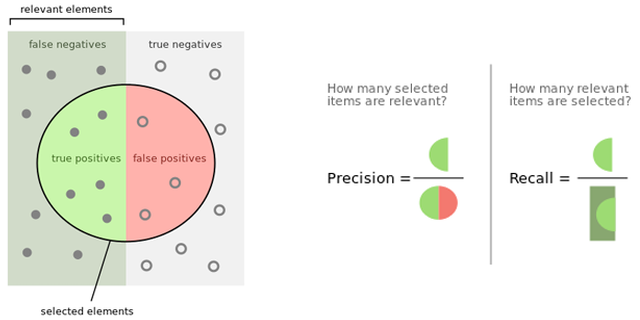

_______________
Посчитайте метрики precision и recall относительно первого класса.


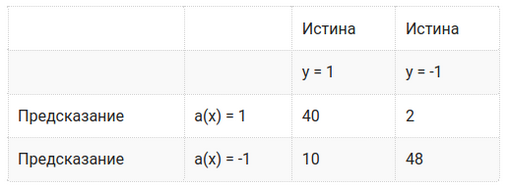
 _______________

**F-score (F-мера, гармоническое среднее)**

*F-score* - метрика объединяющая в себе точность и полноту, выдавая как результат их гармоническое среднее, а коэффициент $\beta$, позволяет балансирвоать вклад, вносимый точностью, тем самым акцентируя внимание на той метрике, максимизация которой для нас наиболее приоритетна.

Наиболее часто встречающаяся вариация данной метрики - это F1-score,<br> Если $\beta$ = 1, влияние точности и полноты одинаково.<br>Если $\beta$ > 1 - смещение в сторону recall.<br>Если 0 < $\beta$ < 1 - смещение в сторону precision

<center>$\LARGE F_{\beta} = (1+ \beta^2) \cdot \frac{precision \: \cdot \: recall}{(\beta^2 \cdot precision) \: + \: recall}$<center>

______________
Сколько ложно-положительных (FP) срабатываний относительно первого класса?

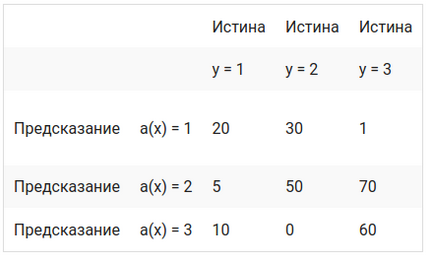
_______________

**PR-кривая**

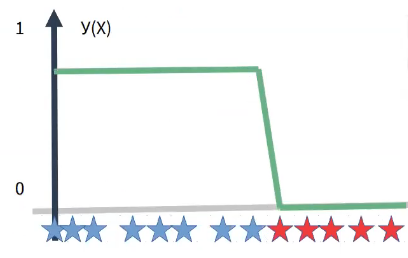

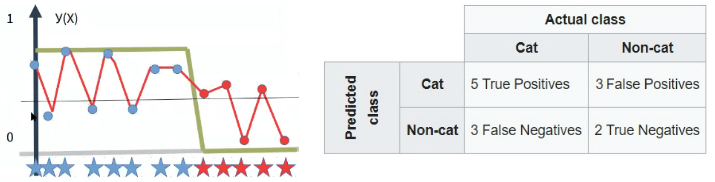

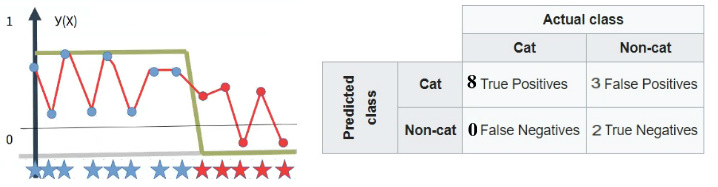

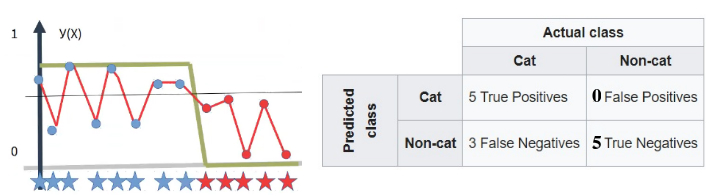

Графичекая характеристика качества бинарного классификатора, отображает зависимость изменения точности алгоритма от его полноты.

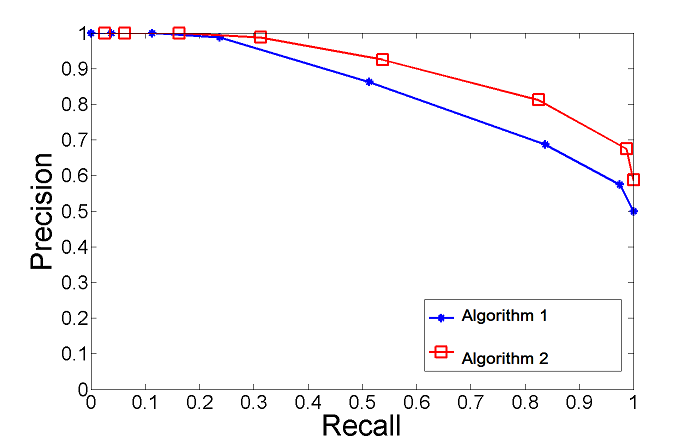

**ROC-кривая + ROC-AUC**

При конвертации вещественного ответа алгоритма (как правило, вероятности принадлежности к классу, отдельно см. SVM) в бинарную метку, мы должны выбрать какой-либо порог, при котором 0 становится 1. Естественным и близким кажется порог, равный 0.5, но он не всегда оказывается оптимальным, например, при вышеупомянутом отсутствии баланса классов.


Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR).

Графичекая характеристика качества бинарного классификатора, отображает зависимость доли верных положительных классификаций *True Positive Rate (TPR)* от доли ложных положительных классификаций *False Positive Rate (FPR)*.

<center>$\large TPR = \LARGE \frac{TP}{TP \: + \: FN} \:\:\:\:\: \large FPR = \LARGE \frac{FP}{FP \: + \: TN}$<center>

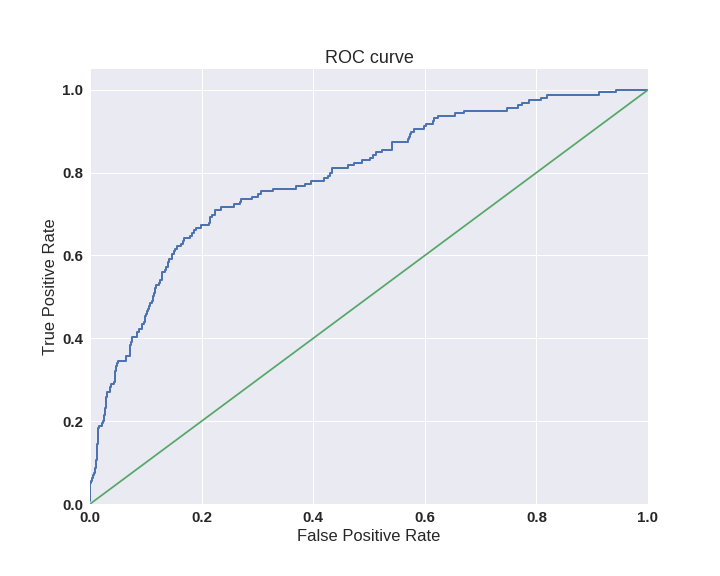

TPR уже известна, это полнота, а FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно. В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1), площадь под кривой, равна единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.
Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).

**PR кривая**

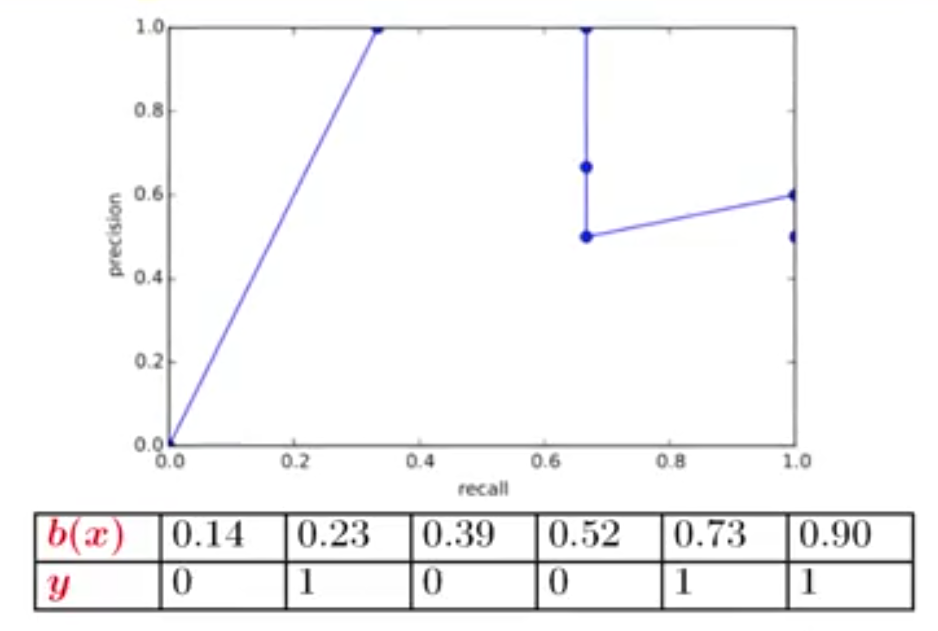

### ROC-кривая
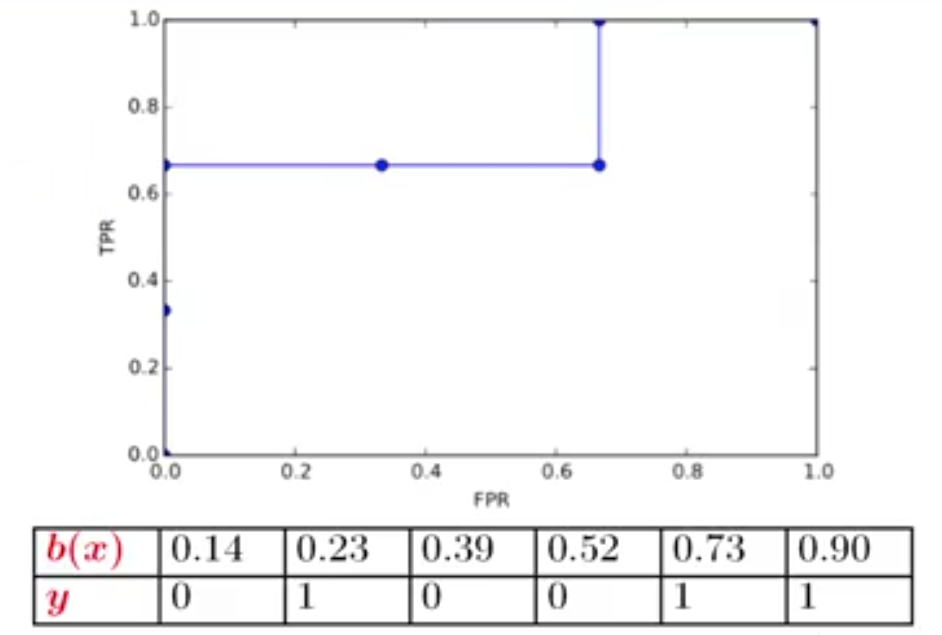


## <center>Практическая часть<a class="anchor" id="practice"></a><center>

- - -

**Подключение библиотек и скриптов**

In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix,  accuracy_score, classification_report#plot_precision_recall_curve, precision_recall_curve, recall_score, plot_roc_curve  #plot_confusion_matrix)

In [43]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Пути к директориям и файлам**

In [45]:
DATASET_PATH = '/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_5/data/training_project/training_project_data.csv'
PREP_DATASET_PATH = '/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_5/data/training_project/training_project_data_prep.csv'

### Постановка задачи<a class="anchor" id="task"></a>

Требуется на основании демографических данных о клиентах банка, истории их платежей и состоянии счета, предсказать невыполнение их обязательств по кредитной карте в следующем месяце.

**Описание датасета**

* **LIMIT_BAL** - Сумма предоставленного кредита
* **SEX** - Пол (1=мужчина, 2=женщина)
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение (1=женат/замужен, 2=не женат/не замужем, 3=прочее)
* **AGE** - Возраст (в годах)
* **PAY_1** - Статус погашения в Сентябре (-1=погашен полностью, 0=погашен частично, 1=отсрочка платежа на один месяц, .., 3=отсрочка платежа на три месяца и более)
* **PAY_2** - Статус погашения в Августе
* **PAY_3** - Статус погашения в Июле
* **PAY_4** - Статус погашения в Июне
* **PAY_5** - Статус погашения в Мае
* **PAY_6** - Статус погашения в Апреле
* **BILL_AMT1** - Сумма выписки по счету в Сентябре
* **BILL_AMT2** - Сумма выписки по счету в Августе
* **BILL_AMT3** - Сумма выписки по счету в Июле
* **BILL_AMT4** - Сумма выписки по счету в Июне
* **BILL_AMT5** - Сумма выписки по счету в Мае
* **BILL_AMT6** - Сумма выписки по счету в Апреле
* **PAY_AMT1** - Сумма предыдущего платежа в Сентябре
* **PAY_AMT2** - Сумма предыдущего платежа в Августе
* **PAY_AMT3** - Сумма предыдущего платежа в Июле
* **PAY_AMT4** - Сумма предыдущего платежа в Июне
* **PAY_AMT5** - Сумма предыдущего платежа в Мае
* **PAY_AMT6** - Сумма предыдущего платежа в Апреле
* **NEXT_MONTH_DEFAULT** - Просрочка платежа в следующем месяце (1=да, 0=нет)

### Загрузка данных<a class="anchor" id="load_data"></a>

In [46]:
df = pd.read_csv(DATASET_PATH)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


In [47]:
df.shape

(10000, 24)

In [48]:
df.iloc[0]

LIMIT_BAL             150000.0
SEX                        2.0
EDUCATION                  2.0
MARRIAGE                   2.0
AGE                       24.0
PAY_1                      1.0
PAY_2                      2.0
PAY_3                      0.0
PAY_4                      0.0
PAY_5                      0.0
PAY_6                      0.0
BILL_AMT1              65542.0
BILL_AMT2              28311.0
BILL_AMT3              23978.0
BILL_AMT4              17853.0
BILL_AMT5              34527.0
BILL_AMT6              28277.0
PAY_AMT1                   0.0
PAY_AMT2                2145.0
PAY_AMT3               10000.0
PAY_AMT4               22000.0
PAY_AMT5                3000.0
PAY_AMT6                5093.0
NEXT_MONTH_DEFAULT         0.0
Name: 0, dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           10000 non-null  float64
 1   SEX                 10000 non-null  int64  
 2   EDUCATION           10000 non-null  int64  
 3   MARRIAGE            10000 non-null  int64  
 4   AGE                 10000 non-null  int64  
 5   PAY_1               10000 non-null  int64  
 6   PAY_2               10000 non-null  int64  
 7   PAY_3               10000 non-null  int64  
 8   PAY_4               10000 non-null  int64  
 9   PAY_5               10000 non-null  int64  
 10  PAY_6               10000 non-null  int64  
 11  BILL_AMT1           10000 non-null  float64
 12  BILL_AMT2           10000 non-null  float64
 13  BILL_AMT3           10000 non-null  float64
 14  BILL_AMT4           10000 non-null  float64
 15  BILL_AMT5           10000 non-null  float64
 16  BILL_

### Приведение типов<a class="anchor" id="cast"></a>

In [50]:
for colname in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[colname] = df[colname].astype(str)

In [51]:
df.dtypes

LIMIT_BAL             float64
SEX                    object
EDUCATION              object
MARRIAGE               object
AGE                     int64
PAY_1                  object
PAY_2                  object
PAY_3                  object
PAY_4                  object
PAY_5                  object
PAY_6                  object
BILL_AMT1             float64
BILL_AMT2             float64
BILL_AMT3             float64
BILL_AMT4             float64
BILL_AMT5             float64
BILL_AMT6             float64
PAY_AMT1              float64
PAY_AMT2              float64
PAY_AMT3              float64
PAY_AMT4              float64
PAY_AMT5              float64
PAY_AMT6              float64
NEXT_MONTH_DEFAULT      int64
dtype: object

### Обзор данных<a class="anchor" id="review"></a>

**Обзор целевой переменной**

In [52]:
df['NEXT_MONTH_DEFAULT'].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

**Обзор количественных признаков**

In [53]:
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,168182.000000,35.39600,51490.560500,49298.972000,47292.40850,43605.665800,40347.829700,38996.784300,5511.82970,5.931217e+03,5385.050600,4585.585700,4712.134300,5055.019400,0.219500
std,130118.668771,9.19536,74906.094564,71808.952137,69398.13263,65062.788893,61044.676044,59682.999879,14748.85889,2.204220e+04,18527.041096,14066.147593,14080.847065,17359.210922,0.413929
min,10000.000000,21.00000,-11545.000000,-24704.000000,-157264.00000,-65167.000000,-23003.000000,-339603.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.00000,3388.000000,3016.500000,2561.75000,2400.000000,1703.250000,1300.750000,1000.00000,7.492500e+02,390.000000,277.250000,300.000000,150.750000,0.000000
50%,140000.000000,34.00000,22896.500000,21576.000000,20370.50000,19194.000000,18261.000000,17338.000000,2163.50000,2.001000e+03,1800.000000,1500.000000,1543.000000,1500.000000,0.000000
75%,240000.000000,41.00000,67834.750000,64243.500000,60783.25000,55731.250000,50491.000000,49696.000000,5001.00000,5.000000e+03,4651.500000,4014.250000,4100.000000,4000.000000,0.000000
max,1000000.000000,75.00000,964511.000000,983931.000000,689643.00000,891586.000000,927171.000000,961664.000000,493358.00000,1.227082e+06,896040.000000,432130.000000,417990.000000,422000.000000,1.000000


**Обзор номинативных признаков**

* **SEX** - Пол (1=мужчина, 2=женщина)
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение (1=женат/замужен, 2=не женат/не замужем, 3=прочее)

In [54]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

SEX

2    6068
1    3932
Name: SEX, dtype: int64
****************************************************************************************************

EDUCATION

2    4678
1    3496
3    1674
5      90
4      42
6      18
0       2
Name: EDUCATION, dtype: int64
****************************************************************************************************

MARRIAGE

2    5332
1    4547
3     108
0      13
Name: MARRIAGE, dtype: int64
****************************************************************************************************

PAY_1

0     4895
-1    2852
1     1217
2      881
3      155
Name: PAY_1, dtype: int64
****************************************************************************************************

PAY_2

0     5178
-1    3318
2     1318
3      175
1       11
Name: PAY_2, dtype: int64
****************************************************************************************************

PAY_3

0     5200
-1    3379
2     1288
3      131
1        2
Name: PAY_3, 

### Обработка пропусков<a class="anchor" id="gaps"></a>

In [55]:
df.isna().sum()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_1                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
NEXT_MONTH_DEFAULT    0
dtype: int64

### Обработка выбросов<a class="anchor" id="outliers"></a>

**EDUCATION**

In [56]:
df.loc[df['EDUCATION'] == '0', 'EDUCATION'] = df['EDUCATION'].mode()[0]

**MARRIAGE**

In [57]:
df.loc[df['MARRIAGE'] == '0', 'MARRIAGE'] = df['MARRIAGE'].mode()[0]

### Построение новых признаков<a class="anchor" id="new_features"></a>

**Dummies**

In [58]:
df['IS_MALE'] = df['SEX'].map({'1':'1', '2':'0'}).astype(int)

In [59]:
for cat_colname in df.select_dtypes(include='object').columns[1:]:
    df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)

In [60]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


### Сохранение обучающего датасета<a class="anchor" id="saving"></a>

In [61]:
df.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

### Обучение модели<a class="anchor" id="training"></a>

In [62]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'NEXT_MONTH_DEFAULT', 'IS_MALE', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_5_-1',
       'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3'],
      dtype='object')

In [63]:
X = df.drop(columns='NEXT_MONTH_DEFAULT')
y = df['NEXT_MONTH_DEFAULT']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2)
X_train.shape, X_test.shape

((8000, 60), (2000, 60))

In [65]:
%%time
tree = DecisionTreeClassifier(random_state=1)

param_grid=[{
             'max_depth': range(1, 15),
             'min_samples_leaf': range(1, 10),
            }]

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
tree = grid_search.best_estimator_

CPU times: user 1min 5s, sys: 510 ms, total: 1min 6s
Wall time: 1min 9s


In [66]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

In [67]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

pred_proba_test = tree.predict_proba(X_test)
pred_proba_test[:5]

array([[0.89156047, 0.10843953],
       [0.89156047, 0.10843953],
       [0.89156047, 0.10843953],
       [0.89156047, 0.10843953],
       [0.79866332, 0.20133668]])

### Подсчет метрик <a class="anchor" id="count_metrics"></a>

In [68]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)
print(f'Accuracy на трейне {accuracy_train}')
print(f'Accuracy на тесте {accuracy_test}')

Accuracy на трейне 0.827375
Accuracy на тесте 0.82


In [69]:
print(confusion_matrix(y_test, pred_test))

[[1503   84]
 [ 276  137]]


In [70]:
print(pd.crosstab(y_test, pred_test))

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   1503   84
1                    276  137


In [71]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1587
           1       0.62      0.33      0.43       413

    accuracy                           0.82      2000
   macro avg       0.73      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



__________
### Micro, Macro, Weighted

In [72]:
from sklearn.metrics import f1_score, precision_score, recall_score, \
                            classification_report, confusion_matrix, accuracy_score, f1_score

In [73]:
true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pred = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]

In [74]:
confusion_matrix(true, pred)

array([[4, 1],
       [5, 5]])

**MICRO**

In [75]:
precision = 9 / 15
precision, accuracy_score(true, pred)

(0.6, 0.6)

In [76]:
recall = 9 / 15
recall, accuracy_score(true, pred)

(0.6, 0.6)

In [77]:
2 * (precision * recall) / (precision + recall)

0.6

In [78]:
f1_score(true, pred, average='micro')

0.6

**MACRO**

In [79]:
precision_0 = 4 / (4 + 5)
precision_1 = 5 / (5 + 1)
macro_pr = (precision_1 + precision_0) / 2
macro_pr

0.6388888888888888

In [80]:
precision_score(true, pred, average='macro')

0.6388888888888888

In [81]:
recall_1 = 5 / (5 + 5)
recall_0 = 4 / (4 + 1)
macro_rec = (recall_1 + recall_0) / 2
macro_rec

0.65

In [82]:
recall_score(true, pred, average='macro')

0.65

In [83]:
# 1 способ
f_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
f_score = (f_score_0 + f_score_1) / 2
f_score_0, f_score_1, f_score

(0.5714285714285714, 0.625, 0.5982142857142857)

In [84]:
# 2 способ
2 * (macro_rec * macro_pr) / (macro_pr + macro_rec)

0.6443965517241379

In [85]:
f1_score(true, pred, average='macro')

0.5982142857142857

**WEIGHTED**

In [86]:
zero = true.count(0)
one = true.count(1)
size = len(true)

In [87]:
zero / size * precision_0 + one / size * precision_1

0.7037037037037037

In [88]:
precision_score(true, pred, average='weighted')

0.7037037037037038

In [89]:
zero / size * recall_0 + one / size * recall_1

0.6

In [90]:
recall_score(true, pred, average='weighted')

0.6

In [91]:
f_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
zero / size * f_score_0  + one / size * f_score_1

0.6071428571428571

In [92]:
f1_score(true, pred, average='weighted')

0.6071428571428572

_________

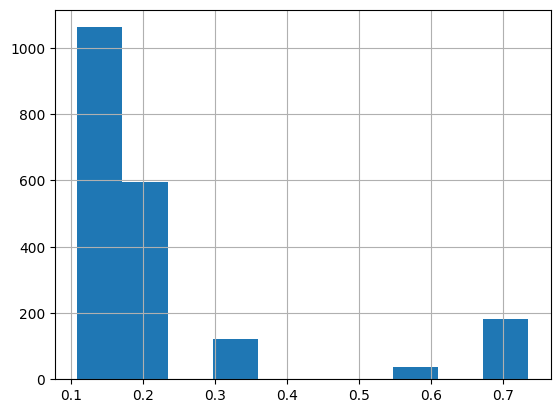

In [93]:
pd.Series(pred_proba_test[:,1]).hist();

In [101]:
pred_test = np.where(pred_proba_test[:,1] >= 0.3, 1, 0)

In [100]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.89      0.60      0.71      1587
           1       0.32      0.72      0.44       413

    accuracy                           0.62      2000
   macro avg       0.60      0.66      0.58      2000
weighted avg       0.77      0.62      0.66      2000



In [104]:
plot_precision_recall_curve(tree, X_test, y_test);

NameError: ignored

In [103]:
precision_recall_curve(y_test, pred_proba_test[:, 1])

NameError: ignored

In [105]:
plot_roc_curve(tree, X_test, y_test);

NameError: ignored

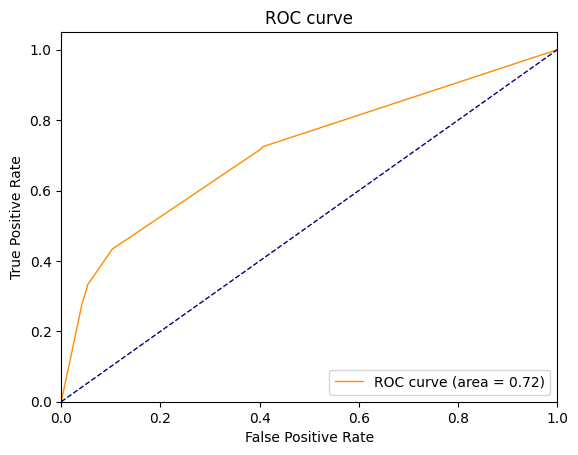

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()